![image](https://www.linkpicture.com/q/nyplogo.jpg)


Welcome to the lab! Before we get started here are a few pointers on Jupyter notebooks.

1. The notebook is composed of cells; cells can contain code which you can run, or they can hold text and/or images which are there for you to read.

2. You can execute code cells by clicking the ```Run``` icon in the menu, or via the following keyboard shortcuts ```Shift-Enter``` (run and advance) or 
```Ctrl-Enter``` (run and stay in the current cell).

3. To interrupt cell execution, click the ```Stop``` button on the toolbar or navigate to the ```Kernel``` menu, and select ```Interrupt ```.

# **Lab 2 (solution) Car Object Detection**

In this Lab we will try to build a car object detector to helps in the recognition and localization of multiple car instances in an image.

The predicted output from the object detector will the label of the object and the bounding box to denote the location of the object. In the following, you can see an example of the object detector predicted 2 objects with label vehicle and 2 bounding boxes to indicate the objects' location.

![image](https://www.linkpicture.com/q/object-detection-introduction.png)


Similar to the Classification problem, we need to collect the data for training. We will collect images that contain cars and provide labels. For Object Detection problem we also need to annotate the locations of the cars in the images to be part of the label. With the prepared dataset, we can do training with the Object Detection neural network.





We will build the car object detector based on the following steps

1.   Collect images for the class car
2.   Annotate each of the objects inside the images 
3.   Train the model with the training set and evaluate it performance
4.   Prediction using trained model




# **1. Collect images for the class car**

We have pre-collected about 25 images of the car for this lab.  It is split into 20 images for training and  5 images for validation.

It is stored in the following dataset directory.

For train data, it store in the path ./dataset/Lab2dataset/data/train.
```
./dataset/Lab2dataset/data/train
                           |- annotations
                           |- images
                   
```
For train data, it store in the path ./dataset/Lab2dataset/data/validation.
```
./dataset/Lab2dataset/data/validation 
                           |- annotations
                           |- images
```



### Exercise

At the upper right corner of the jupyter notebook, select the pre-installed python virtual environment.
Look for python virtual environment with the name tf1env. Select this for our lab exercise. 

![image](https://www.linkpicture.com/q/tf1env.jpg)




Try to display different images with the following code.

- Set the path to the train image eg. data_path_train_images
- Set the file name eg.img1.jpg
- The complete string for the path and file will be eg.  data_path_train_images+'img1.jpg'

If you can do so, that means the dataset is copied correctly into the lab directory.


In [1]:
#Set the variables to store the different path for dataset
data_dir_path='./dataset/Lab2dataset/'
models_path='./dataset/Lab2dataset/models/'
data_path_train_images='./dataset/Lab2dataset/train/images/'
data_path_validation_images='./dataset/Lab2dataset/validation/images/'

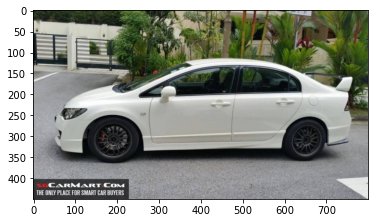

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# TODO: complete the code below
img = mpimg.imread(data_path_train_images+'img1.jpg')
plt.imshow(img)

# **2. Annotate each of the objects inside the image**

In this section we will try to practice how to label and annotate image data. With the help of the LabelImage application, we can label the object and define bounding box parameters.

This execrise will be running on the local computer with the Window OS.


### Exercise

1. In local computer command prompt type labelImg, the labelImage application will launch.

![image](https://www.linkpicture.com/q/labelimage_1.jpg)






2. Use the internet browser download a image(jpg) eg. image.jpg with cars insides.

![image](https://www.linkpicture.com/q/images_141.jpg)





3. In labelImage application,select menu Open. Then look for the downloaded image file name eg. image.jpg. Select file and click Open.

![image](https://www.linkpicture.com/q/labelimage_2.jpg)


4. Once the image is loaded. Goto menu Edit select Create RectBox. Use the curser to draw a box to house the car inside.

![image](https://www.linkpicture.com/q/labelimage_3.jpg)


5. Enter the label name for the object in the box and click on OK button. In the case, our object will car(label). 

![image](https://www.linkpicture.com/q/labelimage_4.jpg)

6. Repeat the step 5 and 6 to complete the annotation of the other cars in the image.

![image](https://www.linkpicture.com/q/labelimage_5.jpg)

7. Select menu File and set the annotation output to be PascalVOC. It is the format for the label and bounding box parameters to be stored in the XML file.

![image](https://www.linkpicture.com/q/labelimage_6.jpg)


8. Select menu File and choose Save. 

![image](https://www.linkpicture.com/q/labelimage_7.jpg)


9.  At the dialog box, you will see a XML file name with the same name as your image file. Click on Save button, a XML file will save into the same directory where your image is.

![image](https://www.linkpicture.com/q/labelimage_8.jpg)


Open up the xml file with any text editor to observe the content inside it.

Can you find where is the label and annotation parameters for each of the car?
<details><summary>Click here for answer</summary> 
<br/>
    The car label is stored inside the XML tag name 
    
    ```
    
    <name>car</name>
    
    
    ```

    The bounding box is stored inside the XML tag name 
    
    ```
    <bndbox>
			<xmin>36</xmin>
			<ymin>22</ymin>
			<xmax>189</xmax>
			<ymax>118</ymax>
	</bndbox>

    ```

<br/>
</details>

This exercise let us have a feel how to do the image annotation to prepare data for object detection training. It is a tedious process to complete for all the images. Due time constraint we will use the dataset that is copied in the VM to do the rest of the lab.

# **3. Train the model with the training set and evaluate it performance**

YOLO is very popular because it achieves high accuracy while also being able to run in real-time. The algorithm “only looks once” at the image in the sense that it only requires the image or the video to pass through the neural network once to make predictions.

With YOLO, a single CNN simultaneously predicts multiple bounding boxes and class probabilities for those boxes. This basically means they recognize where the object is at and uses bounding boxes to show where it is at, and uses class probability to determine what the object is.


![image](https://www.linkpicture.com/q/yolo_1.png)


### Execrise

In this exercise we are going to define the Custom YOLO Object Detection model and perform training.

We will reuse a YOLO pre-trained model in our problem, this is also known as transfer learning. Transfer learning exploits the knowledge gained from a previous task to improve generalization about another. 

- Set the image dataset path for the training. Remember we have copy our dataset to the directory /dataset/Lab2dataset/data/train previously. Define the path inside the function trainer.setDataDirectory(data_directory= path)

   
- Set our YOLO object detection model training parameters in the following function 
```
trainer.setTrainConfig(object_names_array=[#add code], batch_size=#add code, num_experiments=#add code, train_from_pretrained_model=car_dir_path+"pretrained-yolov3.h5")
```

    *   object_names_array : this is an array containing the names of the objects in our dataset(in our case we labeled it car)
    *   batch_size : this is to state the batch size for the training
    *   num_experiments : this is to state the number of times the network will train over all the training images, which is also called epochs
    *   train_from_pretrained_model : this is to train using transfer learning from a pre-trained YOLOv3 model



Observe the training loss result by applying different epoch(num_experiements).

What happen to the loss if the epoch increase?
<details><summary>Click here for answer</summary> 
<br/>
Typically the increase in the number of iterations of the training will help to reduce the loss. Therefore the accuracy of the prediction will increase.
<br/>
</details>




The trained weights file is recorded with the number of epoch and the loss value eg. detection_model-ex-025--loss-0005.643.h5. 

You can use these different trained weights to test the prediction in the next exercise.


In [16]:

from imageai.Detection.Custom import DetectionModelTrainer
trainer = DetectionModelTrainer()
trainer.setModelTypeAsYOLOv3()

# TODO: complete the code below-add the main path where data is stored
trainer.setDataDirectory(data_directory=data_dir_path)

# TODO: complete the code below-Set the training parameters 
trainer.setTrainConfig(object_names_array=['car'], batch_size=4, num_experiments=10, train_from_pretrained_model=data_dir_path+"pretrained-yolov3.h5")

trainer.trainModel()

Generating anchor boxes for training images and annotation...
Average IOU for 9 anchors: 0.90
Anchor Boxes generated.
Detection configuration saved in  ./dataset/Lab2dataset/json/detection_config.json
Training on: 	['car']
Training with Batch Size:  4
Number of Experiments:  10
Training with transfer learning from pretrained Model
Epoch 1/10
40/40 [==============================] - 66s 2s/step - loss: 123.9301 - yolo_layer_4_loss: 19.7270 - yolo_layer_5_loss: 36.3881 - yolo_layer_6_loss: 67.8150 - val_loss: 130.0508 - val_yolo_layer_4_loss: 17.9501 - val_yolo_layer_5_loss: 35.8953 - val_yolo_layer_6_loss: 76.2054
Epoch 2/10
40/40 [==============================] - 27s 685ms/step - loss: 64.0669 - yolo_layer_4_loss: 7.3422 - yolo_layer_5_loss: 15.8768 - yolo_layer_6_loss: 40.8479 - val_loss: 81.0522 - val_yolo_layer_4_loss: 8.5101 - val_yolo_layer_5_loss: 23.5524 - val_yolo_layer_6_loss: 48.9897
Epoch 3/10
40/40 [==============================] - 27s 664ms/step - loss: 40.6356 - yolo_la

# 4. Prediction using trained model

The trained object detection model will predict the objects’ output labels with the corresponding bounding boxes.


### Exercise
For this exercise, we will load the trained weight into the YOLO neural network and perform the prediction.

- Choose one of the weights file from the previous exercise. Assign the file path and file name in the following YOLO neural network function. eg. models_path+'detection_model-ex-009--loss-0016.248.h5'
```
detector.setModelPath(file path + file name)
```
- Assign the unknow image file path and file name to the following YOLO neural network function. Define a file path and different file name to store predicted result. eg. data_dir_path+'image5.jpg'
```
detector.detectObjectsFromImage(input_image=file path + file name, output_image_path=file path + different file name)
```


Run the prediction and observe the result label name, probability and box_points.

What are all there predicted results represent?

<details><summary>Click here for answer</summary> 
<br/>
The label name shows the object being classified and the probability displayed how confidence the object being predicted. And the box points show the localization of the object using the bottom left coordinate and the upper right coordinate to form a bounding box.
<br/>
</details>



Try with another weights with lower loss value and compare the results.
Observe the probability and the postion of the bounding box.


In [ ]:

from imageai.Detection.Custom import CustomObjectDetection
detector = CustomObjectDetection()
detector.setModelTypeAsYOLOv3()

# TODO: complete the code below
detector.setModelPath(models_path+'trained_detection_model-ex-025--loss-0005.643.h5')

detector.setJsonPath(data_dir_path+"json/detection_config.json")

detector.loadModel()

# TODO: complete the code below
detections = detector.detectObjectsFromImage(input_image=data_dir_path+'image5.jpg', output_image_path=data_dir_path+'image5b-output.jpg')

for detection in detections:
    print(detection["name"], " : ", detection["percentage_probability"], " : ", detection["box_points"])

In [22]:
detections = detector.detectObjectsFromImage(input_image=data_dir_path+"image5.jpg", output_image_path=data_dir_path+"image5a-detected.jpg")
for detection in detections:
    print(detection["name"], " : ", detection["percentage_probability"], " : ", detection["box_points"])